### ライブラリのインポート
RSI_optimizer_module.optimizerは内部でtalib, matplotlib, pandasを使用している。

talibはpip installではそのままインストールできないので注意

In [2]:
import importlib

import pandas as pd
import pandas_datareader

from RSI_optimizer_module import optimizer

### 株価データの取得
株価データをpandas_datareaderで取得し、dfとする

In [3]:
df = pandas_datareader.DataReader('1321.JP', 'stooq')
df = df.sort_index().tail(50)  # sorted by date

### インスタンス化
rsi_optimizer = optimizer.RsiOptimizer()等でインスタンス化する

In [4]:
rsi_optimizer = optimizer.RsiOptimizer()

### パラメータ設定
set_params()関数で解析するspan / 買いの閾値% / 売りの閾値% を設定する。

help(rsi_optimizer.set_params())で詳細確認できる

In [5]:
rsi_optimizer.set_params([10, 40], [60, 80], [3, 30])

### 実行
runコマンドで実行する。その際dfを引数に設定する。
戻り値は解析結果を返すが、設定しなくても良い

In [6]:
result = rsi_optimizer.run(df)

[26/26] 計算中...
計算終了


### 解析結果の確認
計算後、result_params()関数で最適化したパラメータを確認できる(python dict型)

In [7]:
rsi_optimizer.result_params()

{'span': 7, 'buy_thres': 37, 'sell_thres': 78, 'profit': 103.81}

### 解析結果のグラフ化
計算後、result_graph()関数でmatplotlibを用いてグラフ表示できる。

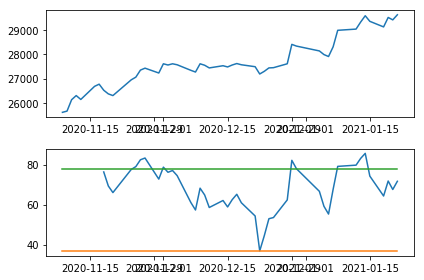

In [9]:
rsi_optimizer.result_graph()